In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("sales_data_sample.csv", encoding='latin1', on_bad_lines='skip')
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (2823, 25)
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue

In [3]:
# Select numerical features for clustering
X = df.select_dtypes(include=['int64', 'float64'])
print("Features used for clustering:\n", X.head())

# Select relevant numeric columns
# X = df[['SALES', 'QUANTITYORDERED', 'PRICEEACH']]

# Handle missing values if any
# X = features.dropna()

Features used for clustering:
    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  QTR_ID  \
0        10107               30      95.70                2  2871.00       1   
1        10121               34      81.35                5  2765.90       2   
2        10134               41      94.74                2  3884.34       3   
3        10145               45      83.26                6  3746.70       3   
4        10159               49     100.00               14  5205.27       4   

   MONTH_ID  YEAR_ID  MSRP  
0         2     2003    95  
1         5     2003    95  
2         7     2003    95  
3         8     2003    95  
4        10     2003    95  


In [4]:
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

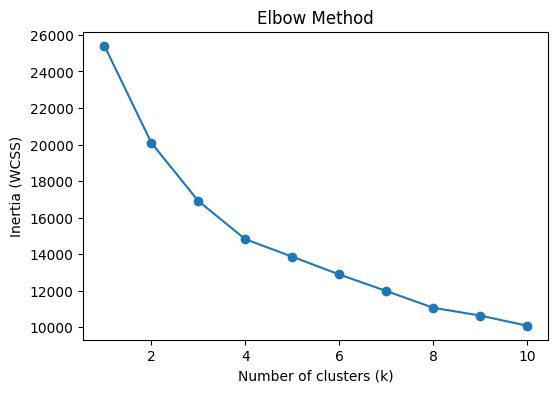

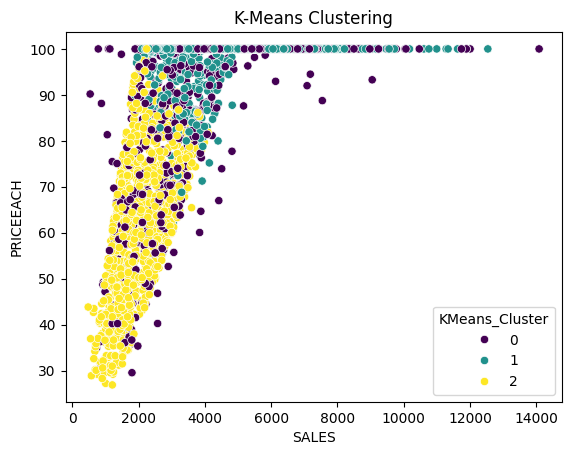


K-Means Cluster Centers:
 [[ 0.80842073  0.15626173  0.1599169  -0.10322049  0.13943053 -1.15351152
  -1.15675151  1.18412804  0.07164397]
 [-0.26408187  0.0398995   0.70503285  0.01560294  0.53444299  0.50961433
   0.5069744  -0.44559165  0.62315027]
 [-0.30770787 -0.1781969  -1.04941352  0.06293662 -0.81019145  0.26569688
   0.2717579  -0.3739815  -0.87128259]]

Cluster counts:
 KMeans_Cluster
1    1183
2     907
0     733
Name: count, dtype: int64


In [5]:
# ========= K-Means clustering ==========
# Determine optimal number of clusters using Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.show()

# Fit KMeans with chosen number of clusters (example: 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42) # Add n_init=10 param in the function to suppress warnings
clusters_kmeans = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = clusters_kmeans

# Visualize clusters
sns.scatterplot(x='SALES', y='PRICEEACH', hue='KMeans_Cluster', data=df, palette='viridis')
plt.title("K-Means Clustering")
plt.show()

print("\nK-Means Cluster Centers:\n", kmeans.cluster_centers_)
print("\nCluster counts:\n", df['KMeans_Cluster'].value_counts())

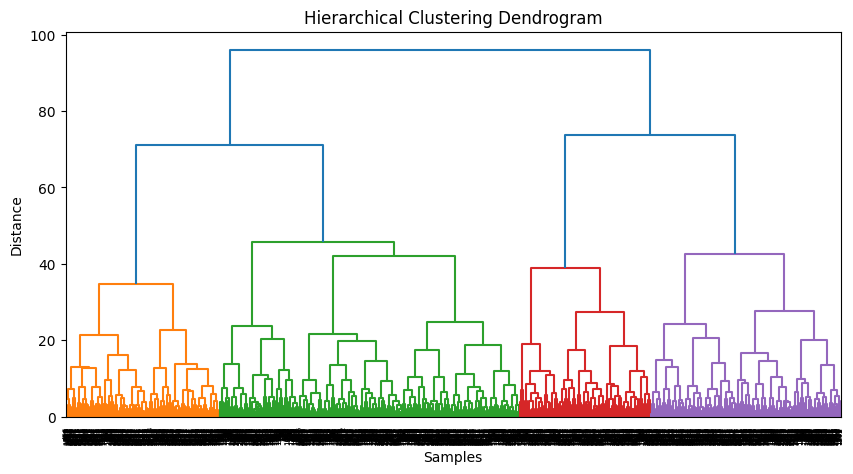


Hierarchical Cluster counts:
 1    1655
3     690
2     478
Name: count, dtype: int64


In [6]:
# ======= Hierarchial clustering ========
# Create linkage matrix
Z = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10,5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Assign clusters (example: 3 clusters)
clusters_hier = fcluster(Z, t=3, criterion='maxclust')
df['Hierarchical_Cluster'] = clusters_hier

print("\nHierarchical Cluster counts:\n", pd.Series(clusters_hier).value_counts())